# Project Task: Week 1
Exploratory Data Analysis (EDA):
1.	Perform an EDA on the Dataset.
•	Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered (mean) with unit standard deviation


In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras.optimizers import RMSprop

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
train_data = pd.read_csv('train_data.csv')
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [3]:
test_data_1 = pd.read_csv('train_data.csv')
test_data_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [4]:
test_hidden = pd.read_csv('test_data_hidden.csv')
test_hidden.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,113050.0,0.114697,0.796303,-0.149553,-0.823011,0.878763,-0.553152,0.939259,-0.108502,0.111137,...,-0.335776,-0.807853,-0.055940,-1.025281,-0.369557,0.204653,0.242724,0.085713,0.89,0
1,26667.0,-0.039318,0.495784,-0.810884,0.546693,1.986257,4.386342,-1.344891,-1.743736,-0.563103,...,-1.377003,-0.072200,-0.197573,1.014807,1.011293,-0.167684,0.113136,0.256836,85.00,0
2,159519.0,2.275706,-1.531508,-1.021969,-1.602152,-1.220329,-0.462376,-1.196485,-0.147058,-0.950224,...,-0.193271,-0.103533,0.150945,-0.811083,-0.197913,-0.128446,0.014197,-0.051289,42.70,0
3,137545.0,1.940137,-0.357671,-1.210551,0.382523,0.050823,-0.171322,-0.109124,-0.002115,0.869258,...,0.157994,0.650355,0.034206,0.739535,0.223605,-0.195509,-0.012791,-0.056841,29.99,0
4,63369.0,1.081395,-0.502615,1.075887,-0.543359,-1.472946,-1.065484,-0.443231,-0.143374,1.659826,...,0.224157,0.821209,-0.137223,0.986259,0.563228,-0.574206,0.089673,0.052036,68.00,0


In [5]:
test_data = pd.merge(test_data_1, test_hidden, how='inner')
test_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,2.462056,1.054865,0.530481,0.47267,-0.275998,0.282435,0.104886,0.254417,316.06,1
1,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,0.322425,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0
2,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,0.322425,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0
3,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,0.322425,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0
4,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,0.322425,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0


In [6]:
train_data.shape

(227845, 31)

In [7]:
test_data.shape

(568, 31)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    227845 non-null  float64
 1   V1      227845 non-null  float64
 2   V2      227845 non-null  float64
 3   V3      227845 non-null  float64
 4   V4      227845 non-null  float64
 5   V5      227845 non-null  float64
 6   V6      227845 non-null  float64
 7   V7      227845 non-null  float64
 8   V8      227845 non-null  float64
 9   V9      227845 non-null  float64
 10  V10     227845 non-null  float64
 11  V11     227845 non-null  float64
 12  V12     227845 non-null  float64
 13  V13     227845 non-null  float64
 14  V14     227845 non-null  float64
 15  V15     227845 non-null  float64
 16  V16     227845 non-null  float64
 17  V17     227845 non-null  float64
 18  V18     227845 non-null  float64
 19  V19     227845 non-null  float64
 20  V20     227845 non-null  float64
 21  V21     22

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    568 non-null    float64
 1   V1      568 non-null    float64
 2   V2      568 non-null    float64
 3   V3      568 non-null    float64
 4   V4      568 non-null    float64
 5   V5      568 non-null    float64
 6   V6      568 non-null    float64
 7   V7      568 non-null    float64
 8   V8      568 non-null    float64
 9   V9      568 non-null    float64
 10  V10     568 non-null    float64
 11  V11     568 non-null    float64
 12  V12     568 non-null    float64
 13  V13     568 non-null    float64
 14  V14     568 non-null    float64
 15  V15     568 non-null    float64
 16  V16     568 non-null    float64
 17  V17     568 non-null    float64
 18  V18     568 non-null    float64
 19  V19     568 non-null    float64
 20  V20     568 non-null    float64
 21  V21     568 non-null    float64
 22  V2

In [10]:
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94752.853076,-0.003321,-0.001652,0.001066,-0.000374,0.000877,0.000770,-0.000035,0.001625,-0.000391,...,0.000563,0.001234,-0.001002,0.000254,0.000218,-0.001128,-0.000346,0.000498,88.522327,0.001729
std,47500.410602,1.963028,1.661178,1.516107,1.415061,1.367074,1.325341,1.220384,1.192648,1.097367,...,0.734187,0.724544,0.625165,0.606012,0.521348,0.482314,0.400286,0.331184,248.100141,0.041548
min,0.000000,-56.407510,-72.715728,-32.965346,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54182.000000,-0.922851,-0.598040,-0.889246,-0.848884,-0.690811,-0.767803,-0.554761,-0.207838,-0.643365,...,-0.228031,-0.540792,-0.162264,-0.354099,-0.317450,-0.327910,-0.070986,-0.053117,5.590000,0.000000
50%,84607.000000,0.012663,0.066665,0.182170,-0.019309,-0.055243,-0.273025,0.040409,0.022928,-0.050932,...,-0.028807,0.008697,-0.011614,0.041212,0.016221,-0.053257,0.001315,0.011216,22.000000,0.000000
75%,139340.000000,1.314821,0.804401,1.029449,0.744822,0.610852,0.400298,0.570631,0.327854,0.596671,...,0.186852,0.529535,0.147067,0.440051,0.351214,0.239885,0.091105,0.078458,77.070000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,6.070850,3.463246,12.152401,33.847808,19656.530000,1.000000


In [11]:
test_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,103633.991197,-1.460647,1.089823,0.230035,1.157144,-0.116498,0.852991,-0.132568,0.308854,0.506862,...,-0.020706,0.158084,-0.122654,-0.189113,0.005826,0.037676,-0.556357,-0.329362,54.691285,0.010563
std,52849.949184,2.851421,1.736704,2.365843,1.744070,1.783110,1.688885,1.763746,1.850051,1.840603,...,0.929156,0.730013,0.426054,0.640290,0.498460,0.515352,1.407618,0.828154,155.849473,0.102324
min,26.000000,-13.668193,-7.592141,-18.256576,-2.483895,-11.731476,-4.192171,-14.873658,-10.648802,-5.418204,...,-4.733761,-2.858266,-3.887507,-1.712506,-2.888726,-1.408127,-8.878665,-3.707261,0.000000,0.000000
25%,60456.500000,-2.215256,-0.062249,-0.618814,-0.109500,-0.947268,-0.383949,-0.759842,-0.156001,-0.174505,...,-0.366727,-0.314081,-0.355170,-0.869790,-0.136412,-0.331759,-0.368796,-0.754864,3.172500,0.000000
50%,117422.000000,-1.196037,1.450535,0.412281,0.976166,-0.012361,0.391201,-0.031502,0.149192,0.124136,...,-0.055985,0.385227,-0.130169,-0.018653,-0.022087,0.140652,-0.040925,-0.044741,9.030000,0.000000
75%,159104.250000,0.997959,1.735034,1.690027,2.831287,1.413376,1.663200,0.585362,1.062872,0.694326,...,0.212517,0.567241,0.088524,0.386205,0.230429,0.327804,0.021194,0.070181,27.437500,0.000000
max,171627.000000,2.154480,9.666883,3.006347,10.648505,4.491831,4.648683,8.300058,9.673941,7.938980,...,7.252584,2.900250,1.584811,1.182948,1.644299,1.833597,2.340472,2.285113,1697.310000,1.000000


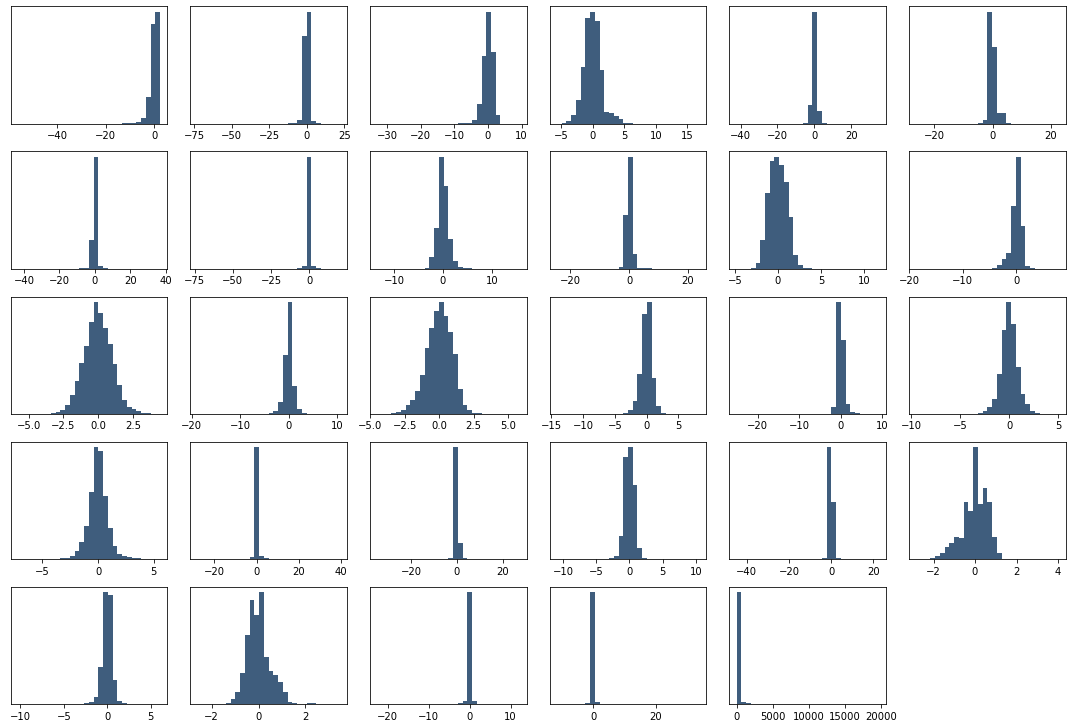

In [12]:
#plot histogramm
fig = plt.figure(figsize=(15, 12))

# loop over all vars (total: 30)
for i in range(1, train_data.shape[1]-1):
    plt.subplot(6, 6, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    # f.axes.set_ylim([0, train.shape[0]])

    vals = np.size(train_data.iloc[:, i].unique())
    if vals < 10:
        bins = vals
    else:
        vals = 10

    plt.hist(train_data.iloc[:, i], bins=30, color='#3F5D7D')

plt.tight_layout()

In [13]:
train_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
test_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

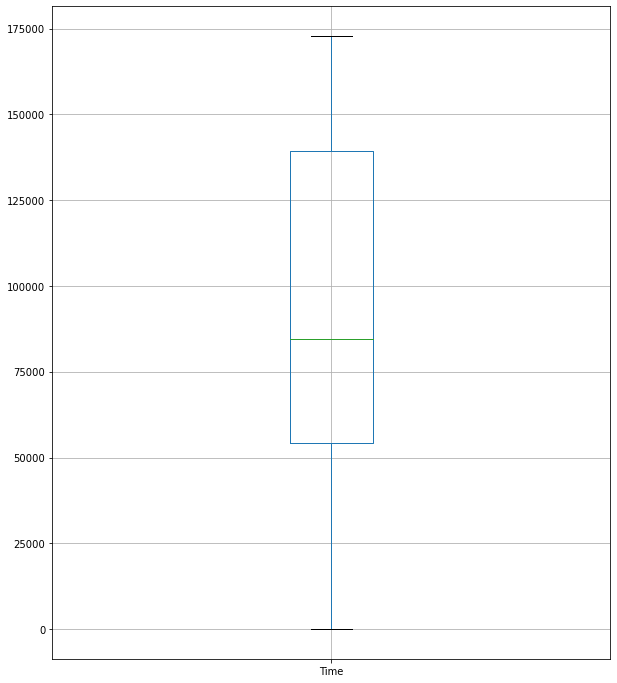

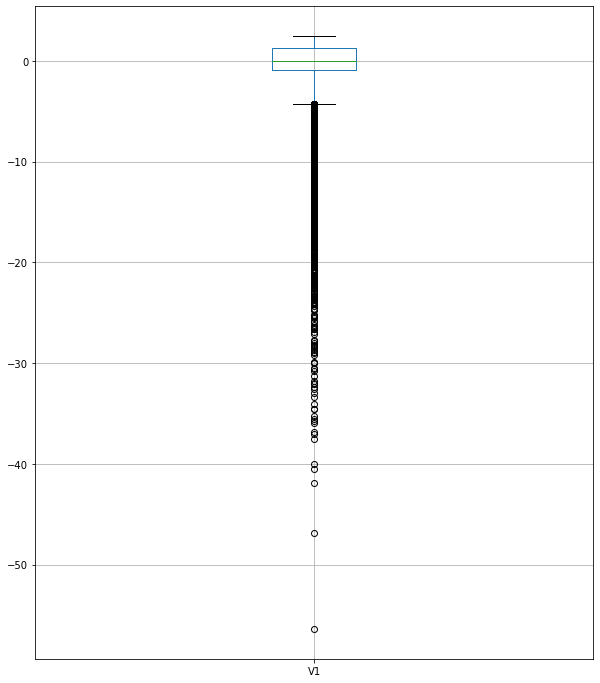

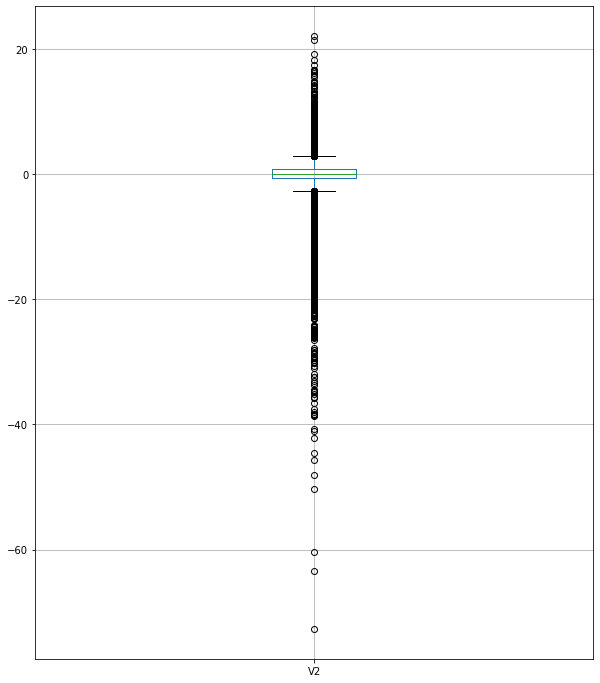

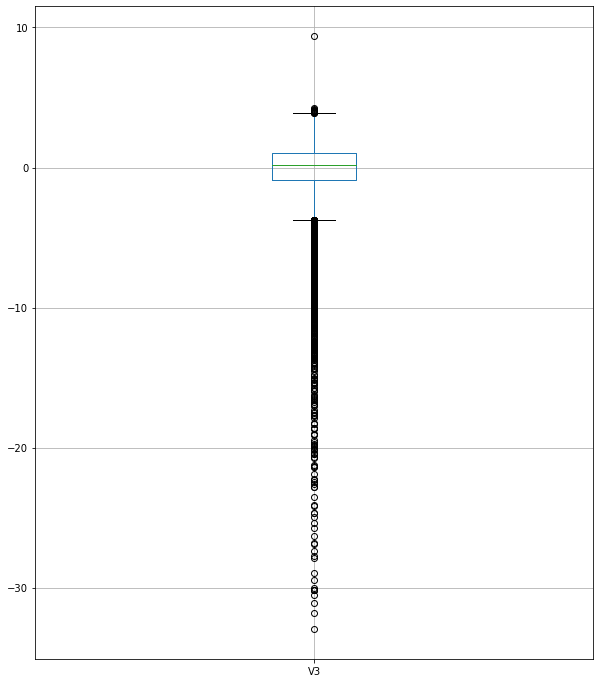

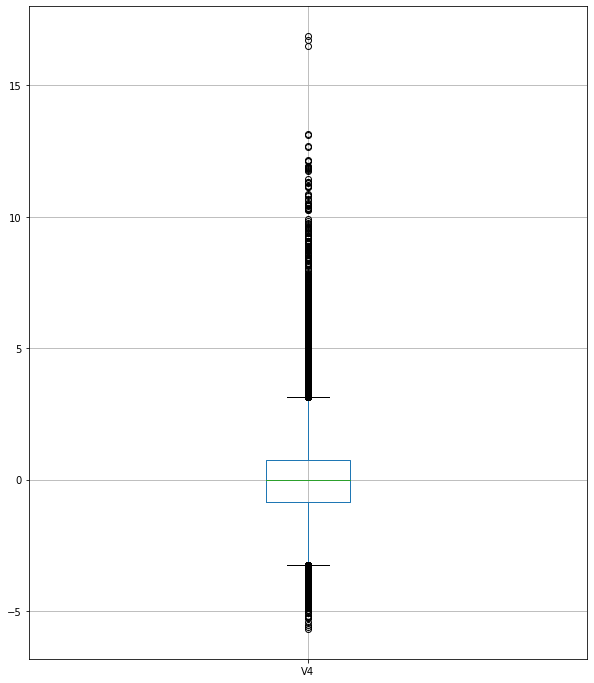

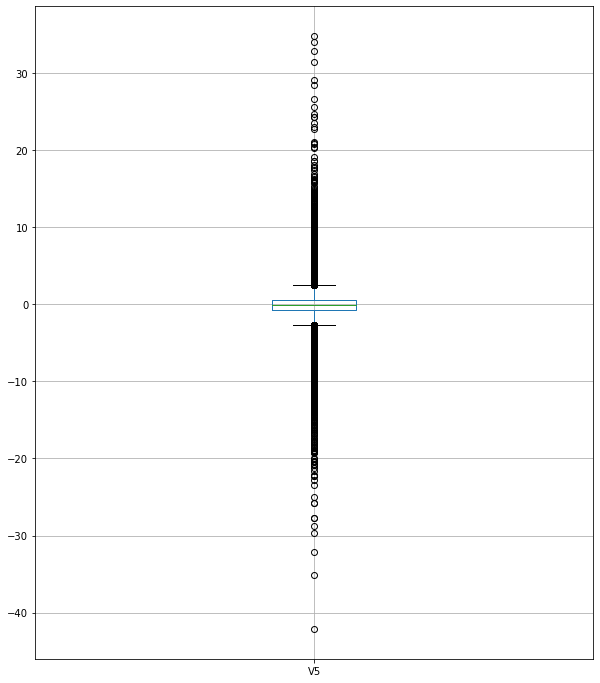

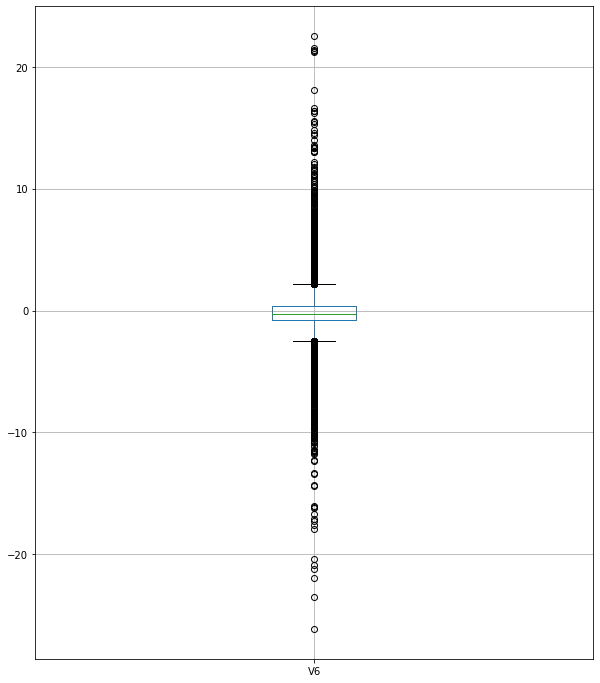

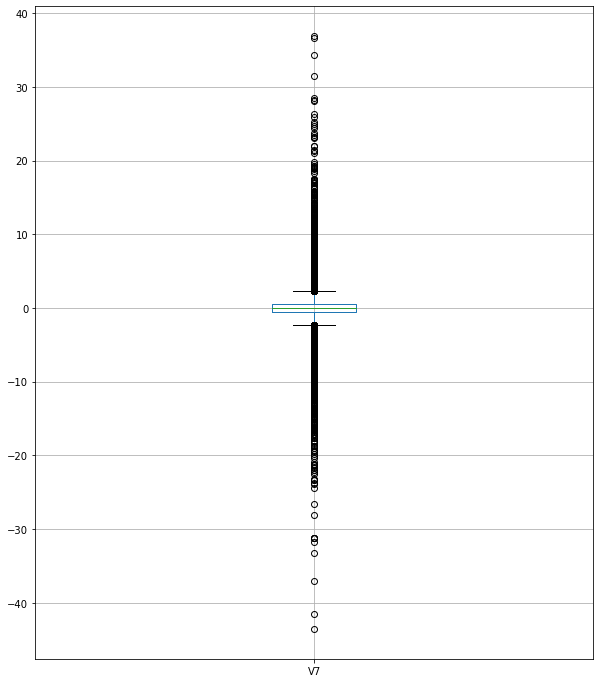

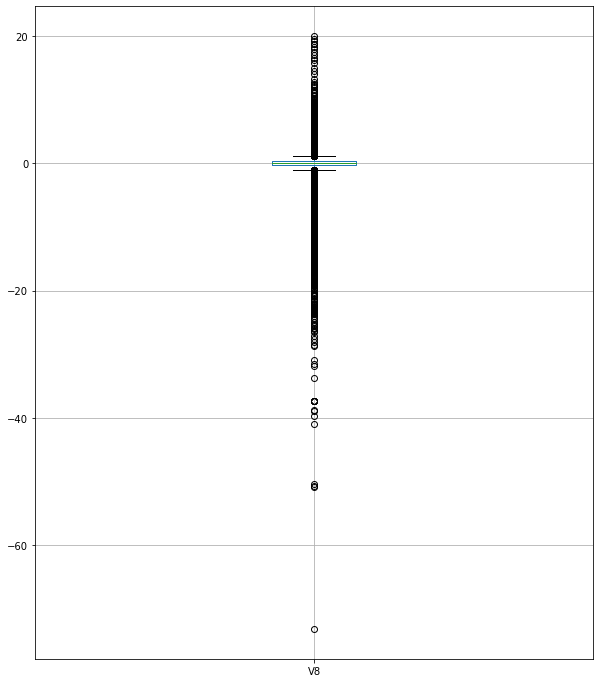

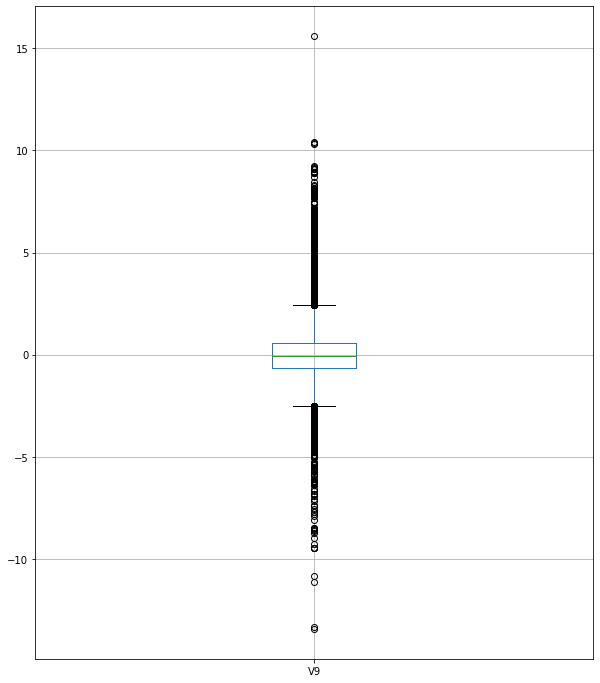

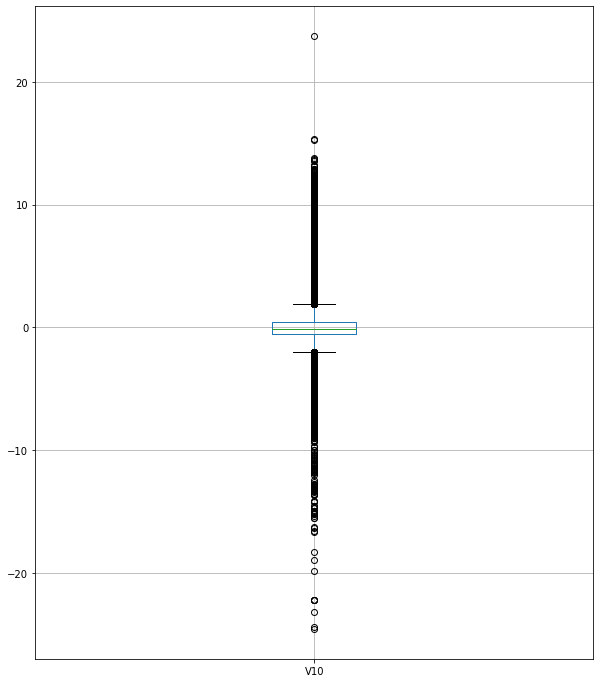

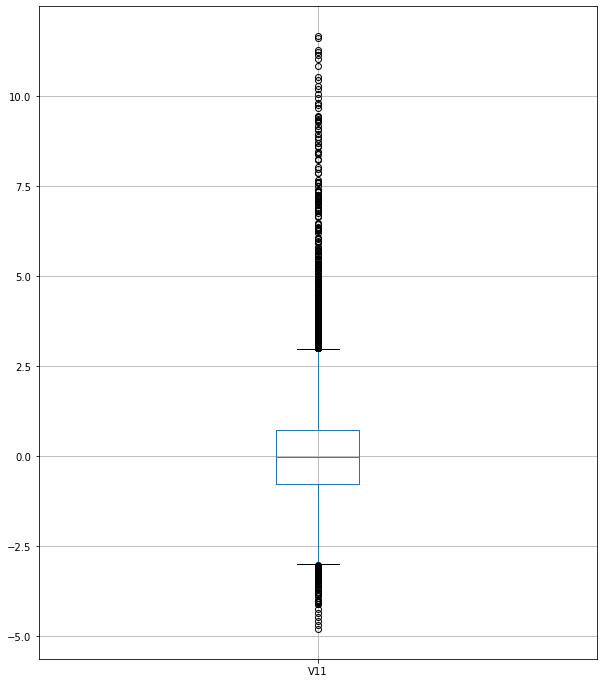

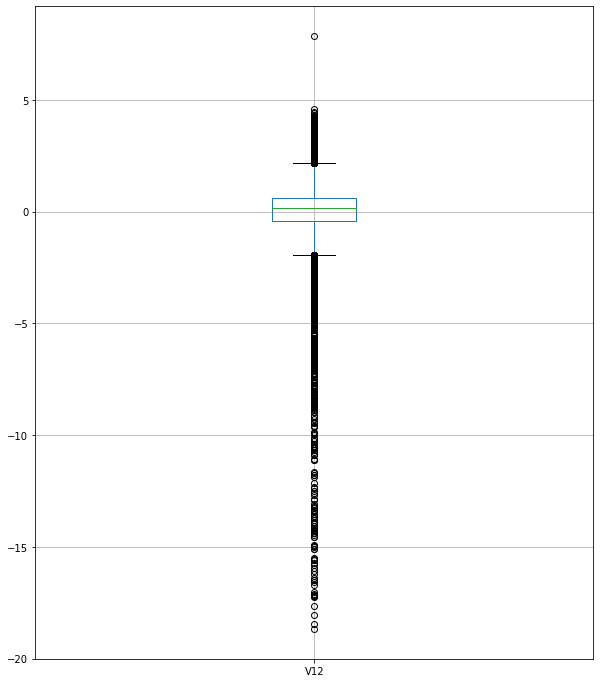

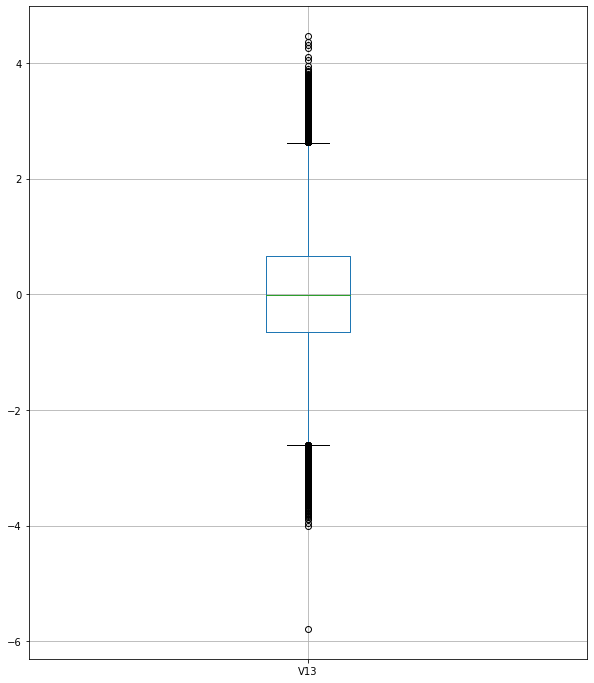

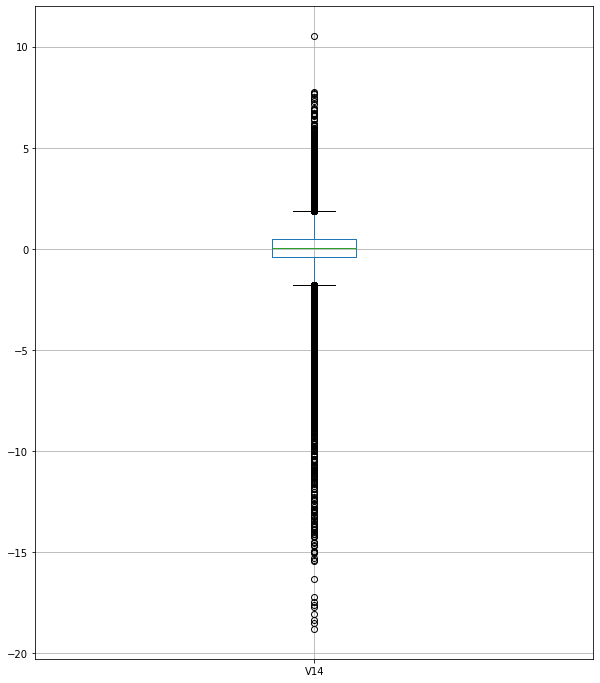

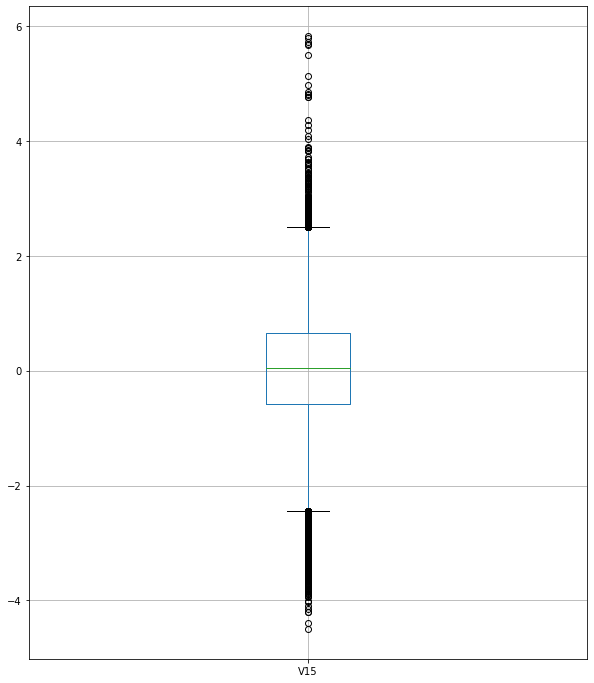

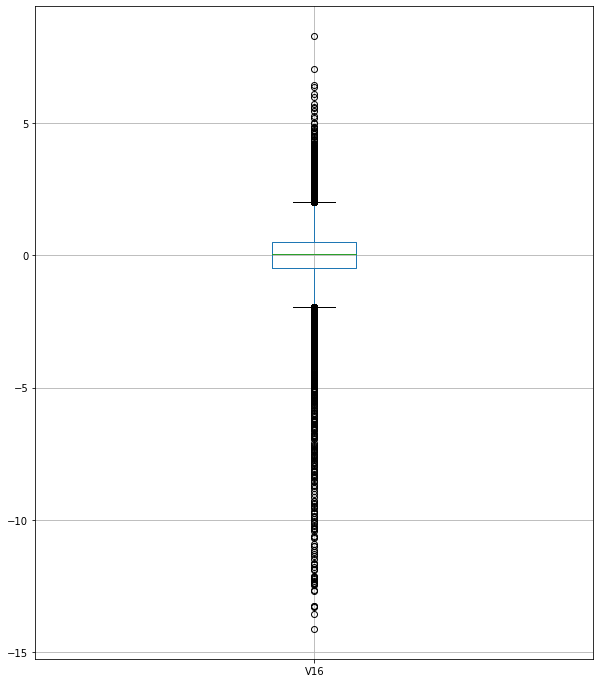

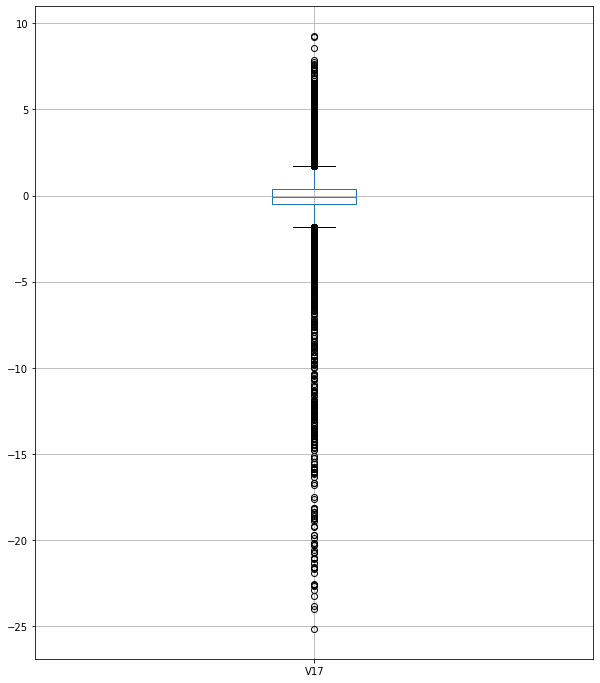

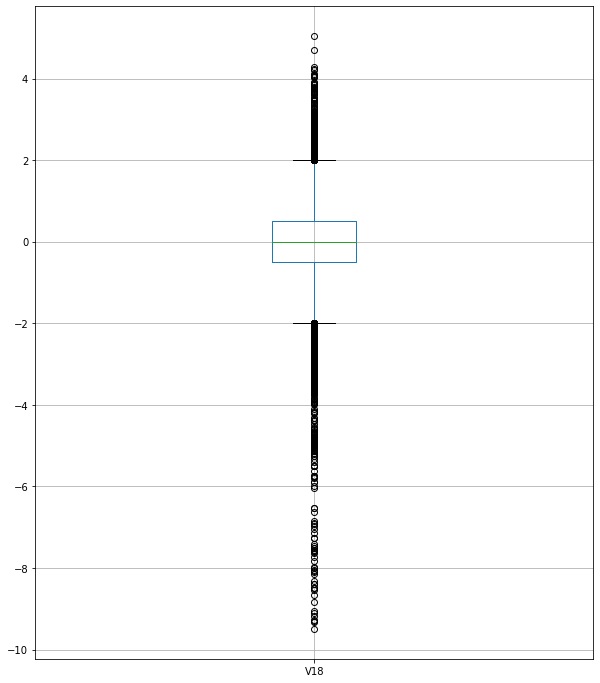

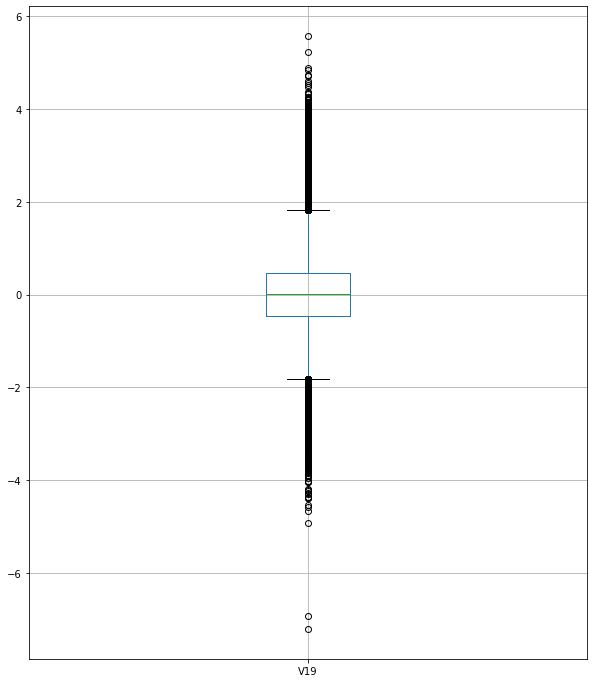

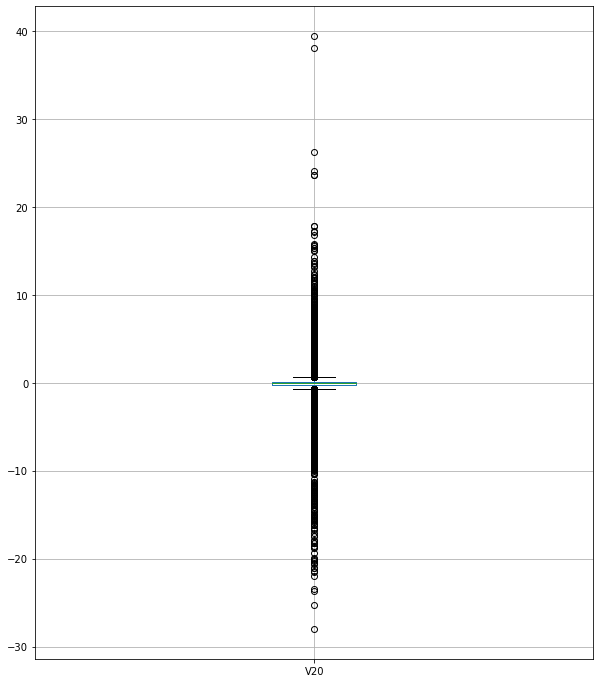

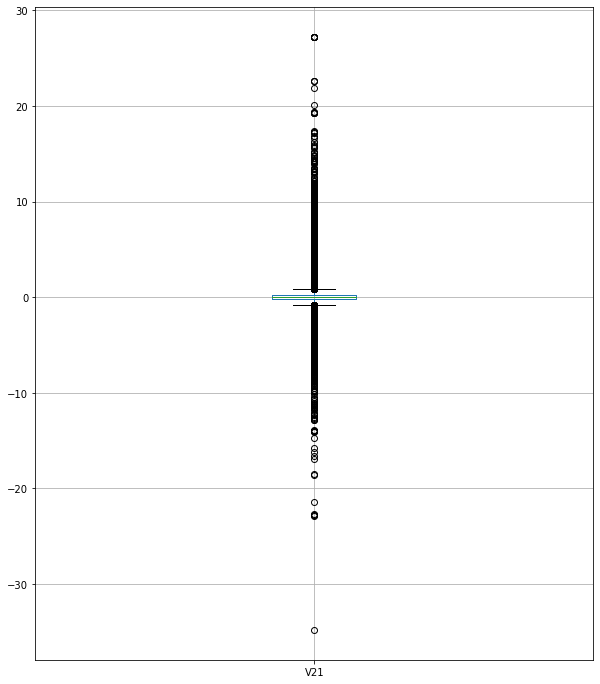

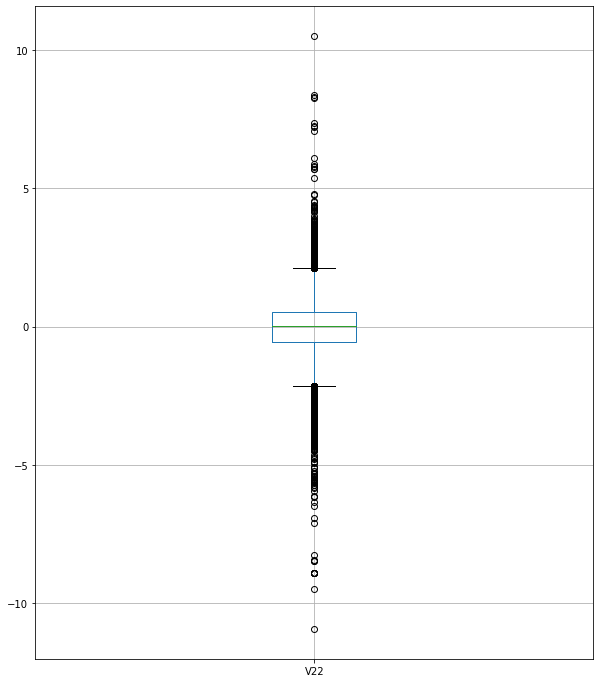

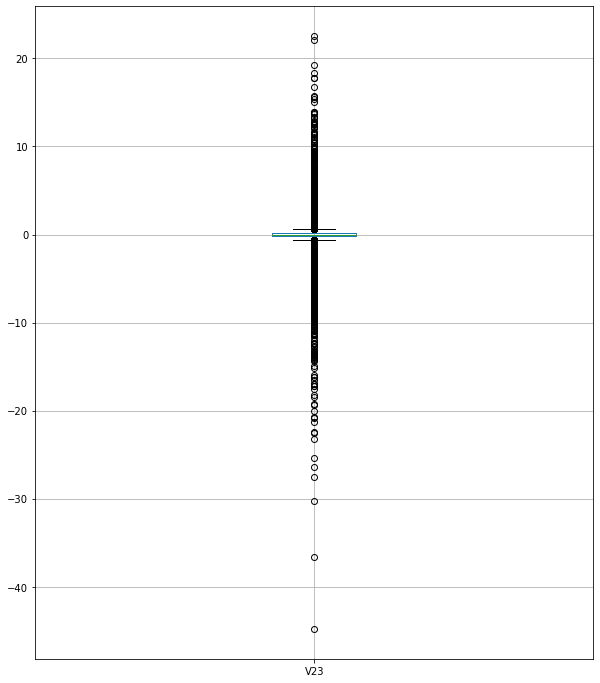

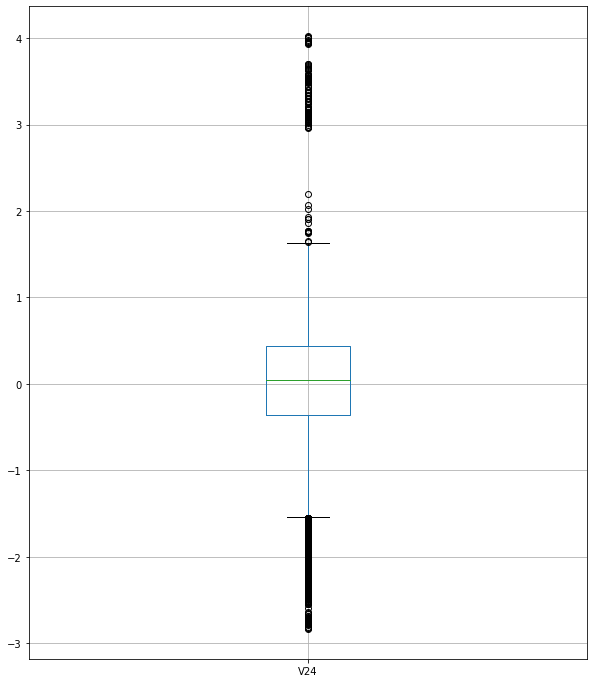

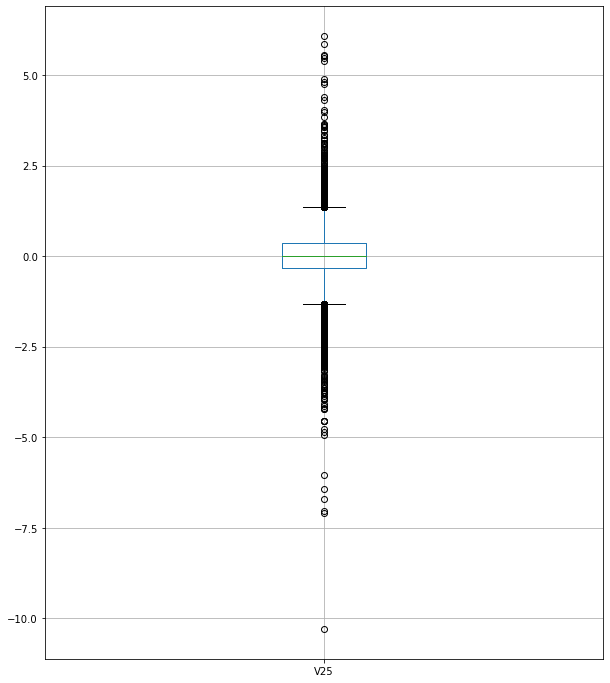

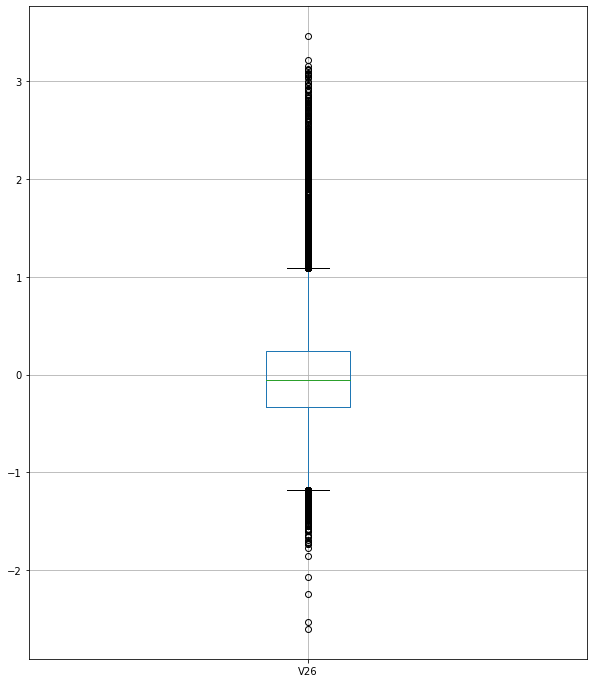

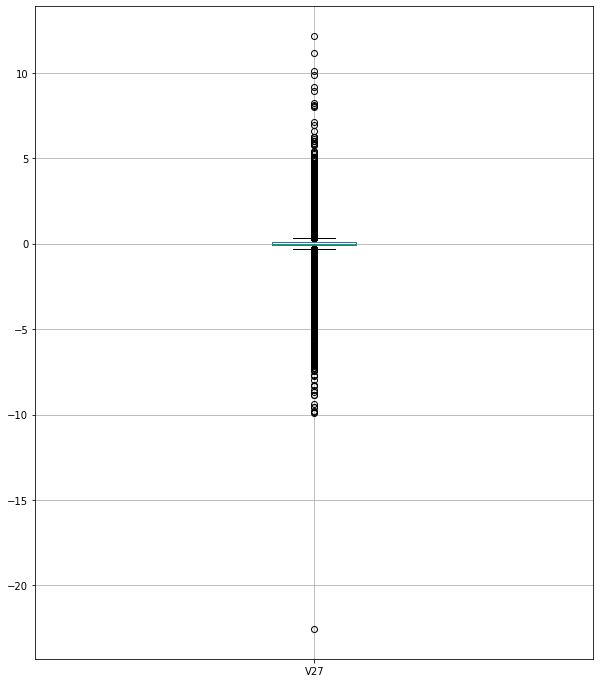

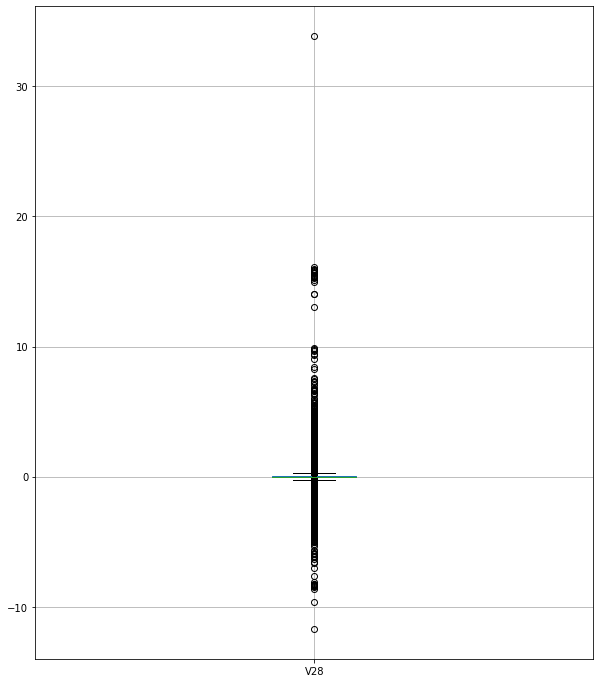

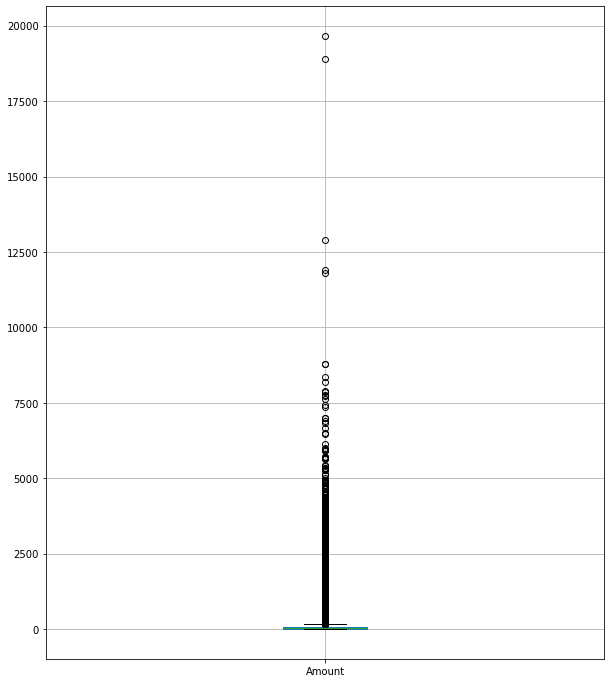

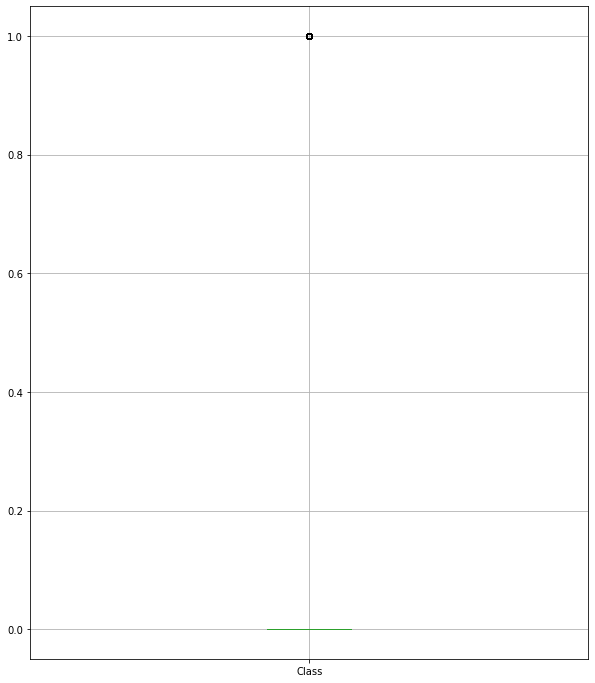

In [15]:
# outlier traitment
for column in train_data:
    plt.figure(figsize = (10,12))
    train_data.boxplot([column])

# •	Find if there is any connection between Time, Amount, and the transaction being fraudulent

[Text(0, 0, 'Normal'), Text(1, 0, 'Fraudulent')]

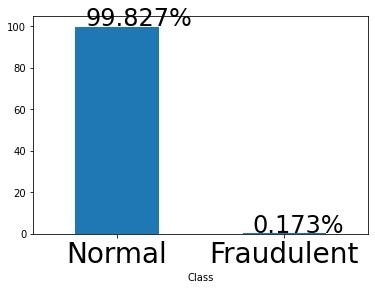

In [16]:
#visualising transactions
ax = train_data.groupby('Class').size().transform(lambda x: (x/sum(x)*100)).plot.bar()
for a in ax.patches:
    ax.text(a.get_x()+.06,a.get_height()+.5,\
           str('{}%'.format(round(a.get_height(),3))),fontsize=24,
              color='black')
old = [0,1]
new = ['Normal','Fraudulent']
ax.set_xticks(old)
ax.set_xticklabels(new,rotation=0,fontsize=28)

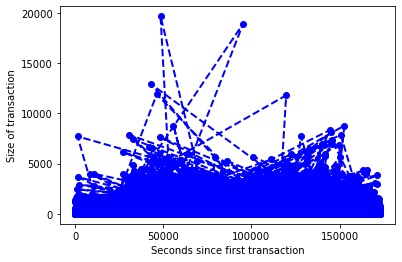

In [17]:
#Visualising Volume of transactions by time
plt.plot( 'Time', 'Amount', data=train_data, marker='o', color='blue',
                  linewidth=2, linestyle='dashed')
plt.xlabel('Seconds since first transaction')
plt.ylabel('Size of transaction')
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams["font.size"] = "20"

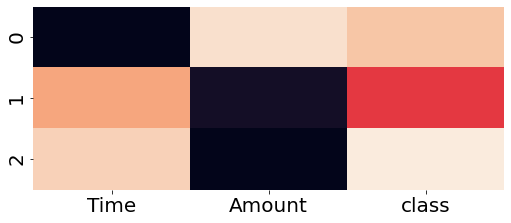

In [18]:
#heat map relation between time,amount n fraudulent activity
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

train = pd.DataFrame(np.random.random((3, 3)), columns=["Time", "Amount", "class"])

sns.heatmap(train, cbar=False)

plt.show()

# 2.	Check the class count for each class. It’s a class Imbalance problem2.	Check the class count for each class. It’s a class Imbalance problem

In [19]:
train_data['Class'].unique()

array([0, 1], dtype=int64)

In [20]:
train_data['Class'].value_counts()

0    227451
1       394
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

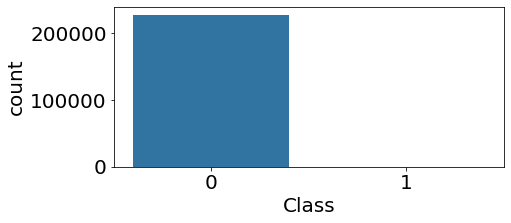

In [21]:
import seaborn as sns
sns.countplot(x='Class', data=train_data)

In [22]:
x_train = train_data.drop('Class', axis = 1)
x_test = test_data.drop('Class', axis=1)
y_train = train_data['Class']
y_test = test_data['Class']

In [23]:
print(x_train.shape)
print(y_train.shape)

(227845, 30)
(227845,)


# 3.	Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
•	Oversampling or undersampling can be used to tackle the class imbalance problem
•	Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets multiplied as the low-proportionate class is mimicked multiple times


# 4.	Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x_train, y_train)
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=.3,random_state=42)


In [27]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() 
def show_metrics(true_vals,pred_vals):
    print(pd.DataFrame(confusion_matrix(true_vals,pred_vals),columns=["0","1"],index=["0","1"]))
    print("\n")
    print(classification_report(true_vals,pred_vals))
    

In [28]:
# naive bayes

from sklearn.metrics import confusion_matrix,classification_report,roc_curve, roc_auc_score, auc
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred = gnb.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred).sum()))
show_metrics(y_test,y_pred)

Number of mislabeled points out of a total 136471 points : 17856
       0      1
0  67676    521
1  17335  50939


              precision    recall  f1-score   support

           0       0.80      0.99      0.88     68197
           1       0.99      0.75      0.85     68274

    accuracy                           0.87    136471
   macro avg       0.89      0.87      0.87    136471
weighted avg       0.89      0.87      0.87    136471



AUC Score is:  0.9829900721520329


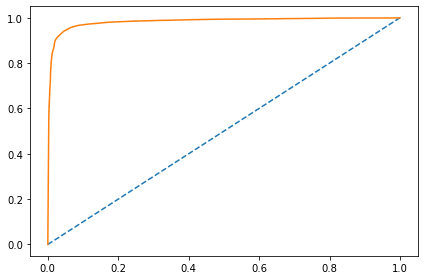

In [29]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =  gnb.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

In [30]:
# logistic regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
clf.predict(x_test)
clf.predict_proba(x_test)
print(clf.score(x_train, y_train))

y_pred_1 = clf.fit(x_train, y_train).predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred_1).sum()))
show_metrics(y_test,y_pred_1)

0.9740760164682458
Number of mislabeled points out of a total 136471 points : 3625
       0      1
0  66981   1216
1   2409  65865


              precision    recall  f1-score   support

           0       0.97      0.98      0.97     68197
           1       0.98      0.96      0.97     68274

    accuracy                           0.97    136471
   macro avg       0.97      0.97      0.97    136471
weighted avg       0.97      0.97      0.97    136471



AUC Score is:  0.9957628926867662


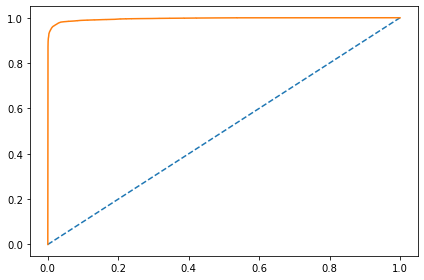

In [31]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =  clf.predict_proba(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

In [56]:
#SVM

from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred_2=svc.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_pred_2).sum()))
show_metrics(y_test,y_pred_2)



Number of mislabeled points out of a total 136471 points : 56774
       0      1
0  29492  38705
1  18069  50205


              precision    recall  f1-score   support

           0       0.62      0.43      0.51     68197
           1       0.56      0.74      0.64     68274

    accuracy                           0.58    136471
   macro avg       0.59      0.58      0.57    136471
weighted avg       0.59      0.58      0.57    136471



In [ ]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =  svc.predict(x_test)[:,1]

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

# best model

from the above observation , we can conclude that logistic regression is the best model 

# Modeling Techniques:
5.	Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
6.	Use different Tree-based classifiers like Random Forest and XGBoost. 
•	Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
•	Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and XGBboost


In [32]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report

In [33]:
rfcl = RandomForestClassifier()
rfcl.fit(x_train,y_train)
y_rfcl = rfcl.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_rfcl).sum()))
show_metrics(y_test,y_rfcl)


Number of mislabeled points out of a total 136471 points : 15
       0      1
0  68182     15
1      0  68274


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68197
           1       1.00      1.00      1.00     68274

    accuracy                           1.00    136471
   macro avg       1.00      1.00      1.00    136471
weighted avg       1.00      1.00      1.00    136471



AUC Score is:  0.9998900244878808


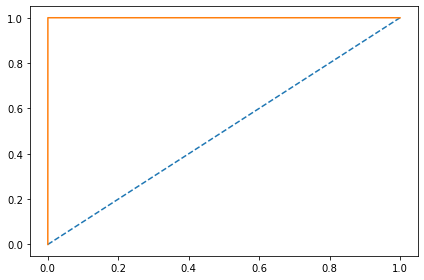

In [55]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =  rfcl.predict(x_test)

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

In [35]:
xgbcl = XGBClassifier()
xgbcl.fit(x_train,y_train)
y_xgbcl = xgbcl.predict(x_test)
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != y_xgbcl).sum()))
show_metrics(y_test,y_xgbcl)

Number of mislabeled points out of a total 136471 points : 21
       0      1
0  68176     21
1      0  68274


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68197
           1       1.00      1.00      1.00     68274

    accuracy                           1.00    136471
   macro avg       1.00      1.00      1.00    136471
weighted avg       1.00      1.00      1.00    136471



AUC Score is:  0.999846034283033


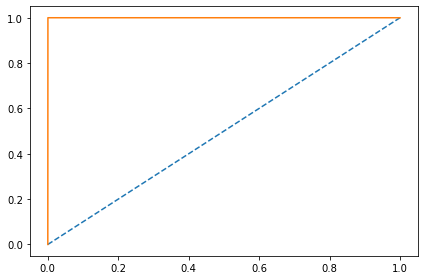

In [54]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =xgbcl.predict(x_test)

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

# 7.	Compare the results of 1 with 2 and check if there is any incremental gain

# Project Task: Week 2
Applying ANN:
1.	Use ANN (Artificial Neural Network) to predict Store Sales.
•	Fine-tune number of layers
•	Number of Neurons in each layers
•	Experiment in batch-size
•	Experiment with number of epochs. Check the observations in loss and accuracy
•	Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
•	Find out which activation performs best for this use case and why?
•	Calculate RMSE
•	Check Confusion Matrix, Precision, Recall and F1-Score
2.	Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from above


3.	Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use techniques like Grid Search, Cross-Validation and Random search.

In [39]:
# Create the function that returns the keras model
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.regularizers import l2
from keras.layers import Dropout
def build_model(lambda_parameter):
    model = Sequential()
    model.add(Dense(30, input_dim=30, activation='relu', kernel_regularizer=l2(lambda_parameter)))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu',kernel_regularizer=l2(lambda_parameter)))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu',kernel_regularizer=l2(lambda_parameter)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))
    
    print(lambda_parameter)
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [40]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# define a seed for random number generator so the result will be reproducible
import numpy
seed = 1
numpy.random.seed(seed)

# create the Keras wrapper with scikit learn
model = KerasClassifier(build_fn=build_model, verbose=False)

# define all the possible values for each hyperparameter
lambda_parameter = [0.001, 0.01, 10]
epochs = [5,10,20]
batch_size = [100, 1000, 2000]

# create the dictionary containing all possible values of hyperparameters
param_grid = dict(lambda_parameter=lambda_parameter, epochs=epochs, batch_size=batch_size)

# perform 5-fold cross validation and store the results
grid_seach = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
results = grid_seach.fit(x_train, y_train)

0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001
0.001
0.001
0.01
0.01
0.01
10
10
10
0.001


In [41]:
# print the results for best cross validation score
print("Best cross validation score =", results.best_score_)
print("Parameters for Best cross validation scor e=", results.best_params_)

# print the results for all evaluated hyperparameter combinations
accuracy_means = results.cv_results_['mean_test_score']
accuracy_stds = results.cv_results_['std_test_score']
parameters = results.cv_results_['params']
for p in range(len(parameters)):
    print("Accuracy %f (std %f) for params %r" % (accuracy_means[p], accuracy_stds[p], parameters[p]))

Best cross validation score = 0.7550616065661112
Parameters for Best cross validation scor e= {'batch_size': 2000, 'epochs': 20, 'lambda_parameter': 0.001}
Accuracy 0.611755 (std 0.149260) for params {'batch_size': 100, 'epochs': 5, 'lambda_parameter': 0.001}
Accuracy 0.600535 (std 0.006796) for params {'batch_size': 100, 'epochs': 5, 'lambda_parameter': 0.01}
Accuracy 0.499352 (std 0.000561) for params {'batch_size': 100, 'epochs': 5, 'lambda_parameter': 10}
Accuracy 0.504499 (std 0.007155) for params {'batch_size': 100, 'epochs': 10, 'lambda_parameter': 0.001}
Accuracy 0.570039 (std 0.050750) for params {'batch_size': 100, 'epochs': 10, 'lambda_parameter': 0.01}
Accuracy 0.500714 (std 0.000474) for params {'batch_size': 100, 'epochs': 10, 'lambda_parameter': 10}
Accuracy 0.526199 (std 0.028604) for params {'batch_size': 100, 'epochs': 20, 'lambda_parameter': 0.001}
Accuracy 0.500718 (std 0.000475) for params {'batch_size': 100, 'epochs': 20, 'lambda_parameter': 0.01}
Accuracy 0.49928

In [44]:
# best model
model = Sequential()
model.add(Dense(30, input_dim=30, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(50, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
    
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_413 (Dense)           (None, 30)                930       
                                                                 
 batch_normalization_246 (Ba  (None, 30)               120       
 tchNormalization)                                               
                                                                 
 dense_414 (Dense)           (None, 100)               3100      
                                                                 
 dropout_166 (Dropout)       (None, 100)               0         
                                                                 
 batch_normalization_247 (Ba  (None, 100)              400       
 tchNormalization)                                               
                                                                 
 dense_415 (Dense)           (None, 50)             

In [47]:
history = model.fit(x_train, y_train, epochs=20, batch_size=2000,validation_split=0.2, verbose=True) 

Epoch 1/50
128/128 [==============================] - 2s 13ms/step - loss: 0.0896 - accuracy: 0.9758 - val_loss: 2.4287 - val_accuracy: 0.5443
Epoch 2/50
128/128 [==============================] - 2s 13ms/step - loss: 0.0889 - accuracy: 0.9754 - val_loss: 2.5002 - val_accuracy: 0.8158
Epoch 3/50
128/128 [==============================] - 2s 12ms/step - loss: 0.1153 - accuracy: 0.9656 - val_loss: 0.4476 - val_accuracy: 0.8900
Epoch 4/50
128/128 [==============================] - 2s 12ms/step - loss: 0.0888 - accuracy: 0.9757 - val_loss: 0.1126 - val_accuracy: 0.9699
Epoch 5/50
128/128 [==============================] - 2s 12ms/step - loss: 0.0894 - accuracy: 0.9752 - val_loss: 0.3917 - val_accuracy: 0.7985
Epoch 6/50
128/128 [==============================] - 2s 12ms/step - loss: 0.0892 - accuracy: 0.9749 - val_loss: 0.4730 - val_accuracy: 0.9213
Epoch 7/50
128/128 [==============================] - 2s 12ms/step - loss: 0.0852 - accuracy: 0.9761 - val_loss: 0.0914 - val_accuracy: 0.9769

In [48]:
preds_array = model.predict(x_test)
pred_list = []
for i,pred in enumerate(preds_array):
    pred_list.append(pred.argmax())

4265/4265 [==============================] - 5s 1ms/step


In [49]:
print("Number of mislabeled points out of a total %d points : %d"
       % (x_test.shape[0], (y_test != pred_list).sum()))
show_metrics(y_test,pred_list)

Number of mislabeled points out of a total 136471 points : 68274
       0  1
0  68197  0
1  68274  0


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     68197
           1       0.00      0.00      0.00     68274

    accuracy                           0.50    136471
   macro avg       0.25      0.50      0.33    136471
weighted avg       0.25      0.50      0.33    136471



4265/4265 [==============================] - 5s 1ms/step
AUC Score is:  0.6634021404895463


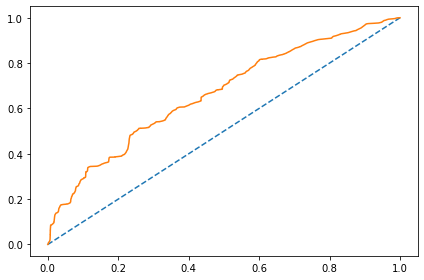

In [52]:
#ROC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#For plotting the curve we need the values of tpr and fpr which is calculated using 
#prob values for 1 predicted by model

probabilityValues =  model.predict(x_test)

#Calc AUC
auc = roc_auc_score(y_test,probabilityValues)
print('AUC Score is: ',auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(y_test,probabilityValues)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

# Anomaly Detection:

•	Assume that the data is coming from a single or a combination of multivariate Gaussian



In [88]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [89]:
testdata1= test_data
traindata1= train_data
print('traindata1.shape',traindata1.shape)
print('testdata1.shape',testdata1.shape)

traindata1.shape (227845, 31)
testdata1.shape (568, 31)


In [90]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = traindata1[traindata1['Class']==1]

Valid = traindata1[traindata1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))

#Extract features and label
X_train=traindata1.drop(columns=['Class'])
y_train=traindata1['Class']

X_test=testdata1.drop(columns=['Class'])
y_test=testdata1['Class']
print('the shape of X_train and  y_train: ', X_train.shape, y_train.shape)
print('the shape of X_test and  y_test: ', X_test.shape,y_test.shape)
# Define a random state 
state = np.random.RandomState(42)

0.0017322412299792043
Fraud Cases : 394
Valid Cases : 227451
the shape of X_train and  y_train:  (227845, 30) (227845,)
the shape of X_test and  y_test:  (568, 30) (568,)


In [91]:
%%time
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction,random_state=state),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction,novelty=True)
   
}


# Model Training and Testing
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X_train)
        y_pred = clf.predict(X_train)
    else:    
        clf.fit(X_train)
        scores_prediction = clf.decision_function(X_train)
        y_pred = clf.predict(X_train)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_train).sum()
    # Run Classification Metrics
    print("{}: {} Errors".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(y_train,y_pred))
    print("Classification Report :")
    print(classification_report(y_train,y_pred))

Isolation Forest: 519 Errors
Accuracy Score :
0.9977221356624021
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.34      0.34      0.34       394

    accuracy                           1.00    227845
   macro avg       0.67      0.67      0.67    227845
weighted avg       1.00      1.00      1.00    227845

Local Outlier Factor: 647 Errors
Accuracy Score :
0.9971603502381005
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.07      0.05      0.06       394

    accuracy                           1.00    227845
   macro avg       0.53      0.52      0.53    227845
weighted avg       1.00      1.00      1.00    227845

Wall time: 5min 19s


# Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in (a)
  Inference and Observations

In [94]:
%%time
#Lets take Isolation Forest as the final model and predict the scores,missclassification error etc.
model_iforest=IsolationForest(n_estimators=200, 
                           max_samples=len(X_train),
                           contamination=outlier_fraction,
                           random_state=state
                          )
model_iforest.fit(X_train)
y_pred_train=model_iforest.predict(X_train) # Predict Train data
y_pred_test=model_iforest.predict(X_test)   # Predict Test data

#Reshape the prediction values to 0 for Non-Fraud , 1 for Fraud transactions for Train
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1

#Reshape the prediction values to 0 for Non-Fraud , 1 for Fraud transactions for Test
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

Wall time: 1min 37s


In [95]:
iforest_prediction_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0,0,0.191107
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0,0,0.166320
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0,0,0.170325
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0,0,0.196440
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0,0,0.190288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,62074.0,-1.993953,1.734986,-1.108037,-2.671817,1.605319,3.041992,-0.417771,1.438007,0.945437,...,0.047110,1.008409,0.234363,0.768581,0.697625,0.354542,14.83,0,0,0.178712
227841,32193.0,-0.440396,1.062920,1.582218,-0.029761,0.040967,-0.903627,0.730326,-0.108175,-0.513163,...,-0.024762,0.382581,-0.164620,0.068836,0.269144,0.123483,2.58,0,0,0.195769
227842,163864.0,0.827820,-2.649344,-3.161235,0.209209,-0.561331,-1.570386,1.612531,-0.930219,-1.318562,...,-0.746698,0.171847,0.247576,0.936557,-0.258164,0.037868,748.04,0,0,0.162061
227843,122571.0,-1.523903,-6.287060,-2.638246,1.330015,-1.672002,1.957509,1.359226,0.081727,0.753151,...,-1.360187,-1.507703,-1.183927,0.578076,-0.328557,0.229935,1771.50,0,0,0.149618


# predict train data

In [96]:
%%time
#Predict the Class
Predicted_Class=pd.DataFrame(data=y_pred_train,columns=['Predicted_Class'])# convert the Predicted_Class to a dataframe
iforest_prediction_train=pd.concat([traindata1,Predicted_Class],axis=1)# append the score column to the original  data

#Find the misclassification error
n_errors = (y_pred_train != y_train).sum()
print('number of missclassification error  is: {}'.format(n_errors))

#Predict the Scores
train_scores=model_iforest.decision_function(X_train) # Predict the scores
train_scores=pd.DataFrame(data=train_scores,columns=['Scores'])# convert the scores to dataframe
iforest_prediction_train=pd.concat([iforest_prediction_train,train_scores],axis=1)# append the score column to the original  data
print("Confusion Matrix : ")
print(confusion_matrix(y_train,y_pred_train))
print("Classification Report :")
print(classification_report(y_train,y_pred_train))

number of missclassification error  is: 537
Confusion Matrix : 
[[227182    269]
 [   268    126]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.32      0.32      0.32       394

    accuracy                           1.00    227845
   macro avg       0.66      0.66      0.66    227845
weighted avg       1.00      1.00      1.00    227845

Wall time: 40.7 s


# predict test data

In [97]:
%%time
#Predict the Class
Predicted_Class=pd.DataFrame(data=y_pred_test,columns=['Predicted_Class'])# convert the Predicted_Class to a dataframe
iforest_prediction_test=pd.concat([testdata1,Predicted_Class],axis=1)# append the score column to the original data

#Find the misclassification error
n_errors = (y_pred_test != y_test).sum()
print('number of missclassification error for the data is: {}'.format(n_errors))

#Predict the Scores
test_scores=model_iforest.decision_function(X_test) # Predict the scores
test_scores=pd.DataFrame(data=test_scores,columns=['Scores'])# convert the scores to dataframe
iforest_prediction_test=pd.concat([iforest_prediction_test,test_scores],axis=1)# append the score column to the original  data
print("Confusion Matrix : ")
print(confusion_matrix(y_test,y_pred_test))
print("Classification Report :")
print(classification_report(y_test,y_pred_test))

number of missclassification error for the data is: 1
Confusion Matrix : 
[[562   0]
 [  1   5]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       562
           1       1.00      0.83      0.91         6

    accuracy                           1.00       568
   macro avg       1.00      0.92      0.95       568
weighted avg       1.00      1.00      1.00       568

Wall time: 192 ms


In [98]:
iforest_prediction_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
0,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1,1,-0.104614
1,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,-0.167361,0.434520,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0,0.186322
2,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,-0.167361,0.434520,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0,0.186322
3,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,-0.167361,0.434520,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0,0.186322
4,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,-0.167361,0.434520,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0,0.186322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,84632.0,-3.698129,1.855492,1.378694,0.330356,-0.946743,0.630004,0.078161,0.560904,2.192314,...,-0.210820,0.036268,0.465915,-0.820087,-1.932227,-1.150570,27.23,0,0,0.168195
564,132699.0,0.600186,-2.654198,-2.542308,0.456329,0.369346,1.677936,0.666785,0.210393,0.484479,...,-0.466008,-0.858110,-0.373725,0.654709,-0.177613,0.028672,704.51,0,0,0.183351
565,159079.0,-2.141627,1.741668,-1.785115,0.169074,1.105381,4.401835,-1.399159,2.655034,-0.288513,...,0.383866,0.630810,-0.748851,-1.043738,-0.879596,-0.053450,40.99,0,0,0.169685
566,119649.0,-6.347908,3.918232,1.415638,-0.634458,0.798707,0.487126,3.246781,-3.639486,7.169955,...,-0.320888,-0.182542,0.643276,-1.408127,-3.702945,-1.181491,15.98,0,0,0.056085


# 5.	Visualize the scores for Fraudulent and Non-Fraudulent transactions

In [104]:
from xgboost import XGBClassifier
model_XGBC=XGBClassifier(scale_pos_weight=99)
model_XGBC.fit( X_train,y_train)
Predicted_Class=model_XGBC.predict(X_test) # predict the class
Predicted_Class=pd.DataFrame(data=Predicted_Class,columns=['Predicted_Class'])# convert the predicted class to a dataframe
XGBC_prediction_test=pd.concat([test_data,Predicted_Class],axis=1)# append the predicted class to the original  test data
XGBC_prediction_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class
0,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,1.054865,0.530481,0.47267,-0.275998,0.282435,0.104886,0.254417,316.06,1,1
1,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0
2,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0
3,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0
4,152242.0,2.108097,0.274271,-2.233325,0.480383,0.568016,-2.003608,1.074235,-0.702590,0.024753,...,1.177736,-0.167361,0.43452,0.769891,0.102772,-0.071621,-0.082331,1.00,0,0


0    562
1      6
Name: Class, dtype: int64

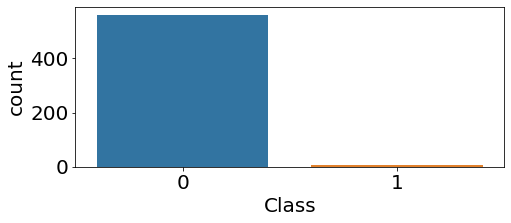

In [105]:
sns.countplot(x=XGBC_prediction_test.Class) # Original test Data
XGBC_prediction_test.Class.value_counts()

0    562
1      6
Name: Predicted_Class, dtype: int64

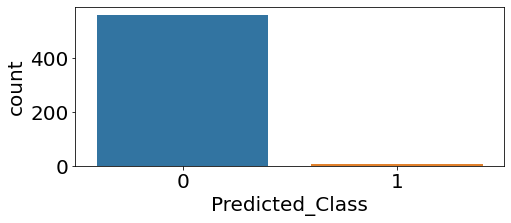

In [106]:
sns.countplot(x=XGBC_prediction_test.Predicted_Class) # Predicted test Data
XGBC_prediction_test.Predicted_Class.value_counts()

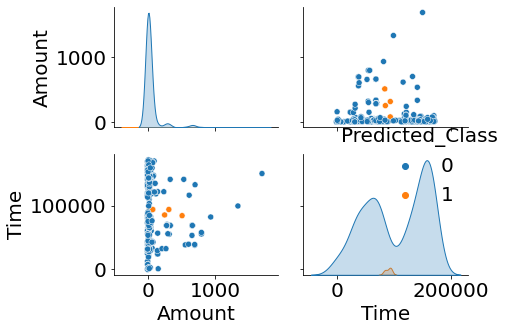

In [107]:
sns.pairplot(iforest_prediction_test,x_vars=['Amount','Time'],y_vars=['Amount','Time'],kind='scatter',hue='Predicted_Class')

<AxesSubplot:xlabel='Scores', ylabel='Density'>

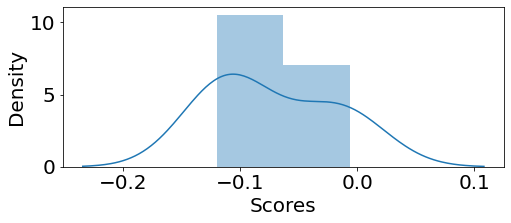

In [108]:
#Lets visualize how the score values are distributed for FRAUD transaction from Isolation Forest

iforest_prediction_test[iforest_prediction_test.Predicted_Class==1].Scores.describe() # FRAUD Transaction
sns.distplot(iforest_prediction_test[iforest_prediction_test.Predicted_Class==1].Scores)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

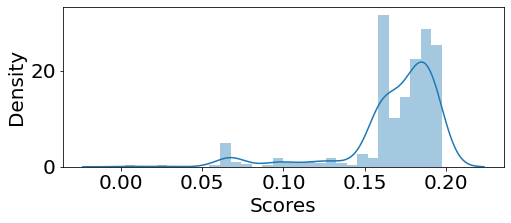

In [109]:
#Lets visualize how the score values are distributed for NON-FRAUD transaction from Isolation Forest
iforest_prediction_test[iforest_prediction_test.Predicted_Class==0].Scores.describe() # NON-FRAUD Transaction
#lets visualize how the score values are distributed for NON-FRAUD transaction from Isolation Forest
sns.distplot(iforest_prediction_test[iforest_prediction_test.Predicted_Class==0].Scores)

# Observation:


From above visualization, we can safely assume that the threshold value for marking or reporting a transaction 
as fraudulent in our anomaly detection system can be around mean value of the score which is anything less than -0.068

In [110]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
iforest_prediction_test[iforest_prediction_test.Predicted_Class==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Class,Scores
0,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,8.460244,-17.003289,0.101557,-14.094452,0.747031,-12.661696,-18.912494,-6.626975,4.008921,0.055684,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1,1,-0.104614
381,93879.0,-13.086519,7.352148,-18.256576,10.648505,-11.731476,-3.659167,-14.873658,8.810473,-5.418204,-13.202577,6.357227,-15.531611,0.659695,-11.412330,-2.447576,-9.833743,-18.174617,-7.269905,0.623797,-1.376298,2.761157,-0.266162,-0.412861,0.519952,-0.743909,-0.167808,-2.498300,-0.711066,30.31,1,1,-0.120197
399,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1,1,-0.006281
488,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,7.190306,-9.424844,-0.223293,-12.875494,-0.071918,-6.299961,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1,1,-0.024878
492,93860.0,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,-15.239962,8.030708,-16.060306,0.270530,-14.952981,-0.241095,-11.866731,-15.486990,-5.748652,4.130031,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1,1,-0.106546
